In [145]:
!pip install tweepy
!pip install textblob
!pip install wordcloud
!pip install pandas 
!pip install numpy
!pip install matplotlib
!pip install deep-translator

In [114]:
import tweepy 
import snscrape.modules.twitter as sntwitter
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import emoji
import time
import itertools
from datetime import datetime
from datetime import timedelta
plt.style.use('fivethirtyeight')

In [110]:
consumerKey = 'aQUS7t6zmD0IdrrFdNXze6YFF'
consumerSecret = 'RQWjvJkCkX7Aae49GSexirzBwdcwnmZ5VasoWfbM2IiYxGA4cv'
accessToken = '3127866623-aHaBOpKnfhOGcb76zQPxGAmpggxz9rnbPyvfxIf'
accessTokenSecret = 'qkAUCYKW8ibsuVLsm81Pd55WAE2I3DSN8DDWUJmOcjbir'

In [111]:
query = "Lula lang:pt until:2022-06-01 since:2022-01-01"
tweets = []
limit = 8000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date', 'Tweet'])
df

,Date,Tweet
0,2022-05-31 23:59:59+00:00,@rbulbow @ChristinaFonse7 @BusterScruggs12 @rs...
1,2022-05-31 23:59:59+00:00,@brunorsouza_1 @MunirDeDireita @murilocarneiro...
2,2022-05-31 23:59:58+00:00,"@sd_bento @WAGNEWS1 @LulaOficial Meu querido, ..."
3,2022-05-31 23:59:58+00:00,@lavajatobr @Jaqueli58866789 Mas ele não fecho...
4,2022-05-31 23:59:58+00:00,Reinaldo Azevedo - Sem Bolsonaro nos debates d...
...,...,...
7995,2022-05-31 22:29:56+00:00,@LulaOficial Caramba! Esse verme ainda quer ro...
7996,2022-05-31 22:29:56+00:00,@senadorhumberto @LulaOficial @danilo4010 @csi...
7997,2022-05-31 22:29:55+00:00,@DeputadoFederal @LulaOficial Vai passar vergo...
7998,2022-05-31 22:29:55+00:00,@LulaOficial Não tira o Bozo da boca... kkkkkkkk


In [115]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0-9]+',' ',text) # Removed @ mentions
    text = re.sub(r'#',' ',text) # Removing the '#' symbol
    text = re.sub(r'RT[\s]+',' ',text) # Removing RT
    text = re.sub(r'https?:\/\/\S+',' ',text) # Remove the hyper link 
    text = re.sub(r'_:',' ',text) 
    text = re.sub(r'\n',' ',text) 
    text = re.sub(r':',' ',text) 
    text = re.sub(r'_',' ',text)
    return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', text)

df['Tweet'] = df['Tweet'].apply(cleanTxt)
df['Tweet'] = df['Tweet'].apply(remove_emoji)
df = df.reindex(np.random.permutation(df.index))
df

,Date,Tweet
687,2022-05-31 23:52:14+00:00,Lula watching this
5388,2022-05-31 22:58:24+00:00,"v4g4bundo does something useful, Bolivia is bl..."
2629,2022-05-31 23:29:37+00:00,Flat-faced liars... the PT voter has to preten...
5234,2022-05-31 23:00:09+00:00,That's an appeal lol
7211,2022-05-31 22:38:18+00:00,"At least it's releasing fgts, and you Lula nev..."
...,...,...
7468,2022-05-31 22:35:38+00:00,afonso1 Why are Brazilians coming to ask for w...
7452,2022-05-31 22:35:47+00:00,Leak donkey....squid will mold in jail yet
7595,2022-05-31 22:34:22+00:00,KKKKKK IS THE PEOPLE IN FRANCE? OR SHOULD IT B...
5685,2022-05-31 22:55:11+00:00,What do you mean Lula won't save all the destr...


In [113]:
from deep_translator import GoogleTranslator

translated = []
for i in range(len(df)):
    text = GoogleTranslator(source='pt', target='en').translate(df['Tweet'][i])
    translated.append(text)
    
df_en  = df
df_en['Tweet'] = translated
df_en

,Date,Tweet
6377,2022-05-31 22:46:54+00:00,Lula 2022 in the first round. And if you compl...
371,2022-05-31 23:55:45+00:00,1 BSilva There was another one there who adver...
5794,2022-05-31 22:53:46+00:00,"bento My dear, we have been like this since 20..."
4256,2022-05-31 23:11:21+00:00,But didn't he close to support Lula in MG?
4889,2022-05-31 23:04:20+00:00,Reinaldo Azevedo - Without Bolsonaro in the 1s...
...,...,...
5275,2022-05-31 22:59:38+00:00,Damn it! Does this worm still want to steal mo...
6097,2022-05-31 22:50:16+00:00,Will they steal the objects from the closed ho...
6860,2022-05-31 22:41:59+00:00,"You're going to be ashamed of yourself, you th..."
7232,2022-05-31 22:38:11+00:00,Don't take Bozo out of your mouth... lol


In [106]:
!pip install --upgrade google.cloud

In [107]:
!pip install --upgrade google.api.core

In [116]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df_en['Subjectivity'] = df_en['Tweet'].apply(getSubjectivity)
df_en['Polarity'] = df_en['Tweet'].apply(getPolarity)
df_en

,Date,Tweet,Subjectivity,Polarity
6377,2022-05-31 22:46:54+00:00,Lula 2022 in the first round. And if you compl...,0.366667,0.025
371,2022-05-31 23:55:45+00:00,1 BSilva There was another one there who adver...,1.000000,0.000
5794,2022-05-31 22:53:46+00:00,"bento My dear, we have been like this since 20...",1.000000,0.000
4256,2022-05-31 23:11:21+00:00,But didn't he close to support Lula in MG?,0.000000,0.000
4889,2022-05-31 23:04:20+00:00,Reinaldo Azevedo - Without Bolsonaro in the 1s...,0.400000,-0.200
...,...,...,...,...
5275,2022-05-31 22:59:38+00:00,Damn it! Does this worm still want to steal mo...,0.500000,0.500
6097,2022-05-31 22:50:16+00:00,Will they steal the objects from the closed ho...,0.100000,-0.100
6860,2022-05-31 22:41:59+00:00,"You're going to be ashamed of yourself, you th...",0.000000,0.000
7232,2022-05-31 22:38:11+00:00,Don't take Bozo out of your mouth... lol,0.700000,0.800


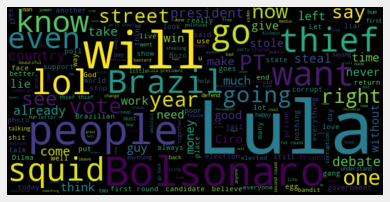

In [117]:
allWords = ' '.join(df['Tweet'])
wordCloud = WordCloud(width = 600, height = 300, random_state = 21,max_font_size = 119).generate(allWords)

plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [119]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df_en['Analysis'] = df_en['Polarity'].apply(getAnalysis)
df_en

,Date,Tweet,Subjectivity,Polarity,Analysis
6377,2022-05-31 22:46:54+00:00,Lula 2022 in the first round. And if you compl...,0.366667,0.025,Positive
371,2022-05-31 23:55:45+00:00,1 BSilva There was another one there who adver...,1.000000,0.000,Neutral
5794,2022-05-31 22:53:46+00:00,"bento My dear, we have been like this since 20...",1.000000,0.000,Neutral
4256,2022-05-31 23:11:21+00:00,But didn't he close to support Lula in MG?,0.000000,0.000,Neutral
4889,2022-05-31 23:04:20+00:00,Reinaldo Azevedo - Without Bolsonaro in the 1s...,0.400000,-0.200,Negative
...,...,...,...,...,...
5275,2022-05-31 22:59:38+00:00,Damn it! Does this worm still want to steal mo...,0.500000,0.500,Positive
6097,2022-05-31 22:50:16+00:00,Will they steal the objects from the closed ho...,0.100000,-0.100,Negative
6860,2022-05-31 22:41:59+00:00,"You're going to be ashamed of yourself, you th...",0.000000,0.000,Neutral
7232,2022-05-31 22:38:11+00:00,Don't take Bozo out of your mouth... lol,0.700000,0.800,Positive


In [120]:
j = 1
sortedDF = df_en.sort_values(by=['Polarity'])
for i in range(50):
    if(sortedDF['Analysis'][i]== 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweet'][i] + '\n')
        j += 1

1) I think the last time you were in the South was to attend your second instance trial! At the time, the Court recognized you as a criminal and even increased the penalties imposed on you in the first instance... If it weren't for the maneuver with the supreme "friends"... It was jail

2) How cold in Recife now!!!

3) Mergulhao oficial Brasil oficial You still haven't proved your fake news, prove it! Anyone can make memes, go coward, leave ZAP to look for data that proves it's not fake news, go!

4) Bunch of hypocrites... They spent the 2018 election complaining about Bolsonaro's absence in the debates, and now they relativize Lula's absence. Who's afraid to debate?



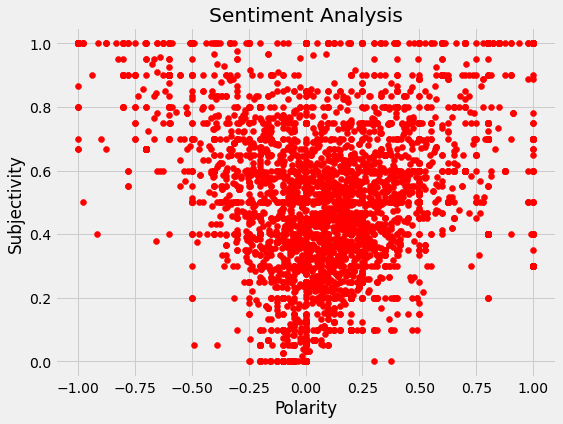

In [121]:
plt.figure(figsize=(8,6))

for i in range(0,df.shape[0]):
    plt.scatter(df_en['Polarity'][i], df_en['Subjectivity'][i], color = 'Red')
                                      
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [122]:
ptweets = df_en[df_en.Analysis == 'Positive']
ptweets = ptweets['Tweet']

print('Positive: ', round((ptweets.shape[0]/df_en.shape[0])*100,1))

ptweets = df_en[df_en.Analysis == 'Neutral']
ptweets = ptweets['Tweet']

print('Neutral: ', round((ptweets.shape[0]/df_en.shape[0])*100,1))

ptweets = df_en[df_en.Analysis == 'Negative']
ptweets = ptweets['Tweet']

print('Negative: ', round((ptweets.shape[0]/df_en.shape[0])*100,1))

Positive:  36.1
Neutral:  43.7
Negative:  20.2


In [123]:
df_useless = df_en[df_en['Analysis'].str.contains('Neutral')]
df_useless

,Date,Tweet,Subjectivity,Polarity,Analysis
371,2022-05-31 23:55:45+00:00,1 BSilva There was another one there who adver...,1.00,0.0,Neutral
5794,2022-05-31 22:53:46+00:00,"bento My dear, we have been like this since 20...",1.00,0.0,Neutral
4256,2022-05-31 23:11:21+00:00,But didn't he close to support Lula in MG?,0.00,0.0,Neutral
1576,2022-05-31 23:42:03+00:00,God forbid steals double Brazil can't take it,0.00,0.0,Neutral
5417,2022-05-31 22:58:07+00:00,m22 The blindness of left-wing political milit...,0.55,0.0,Neutral
...,...,...,...,...,...
5943,2022-05-31 22:51:53+00:00,Lula is a thief!!! And he will never be our pr...,0.00,0.0,Neutral
7299,2022-05-31 22:37:25+00:00,'Turma do Lula' Hang attacks Father Lancellott...,0.10,0.0,Neutral
1109,2022-05-31 23:47:25+00:00,Go thief stop street.,0.00,0.0,Neutral
6860,2022-05-31 22:41:59+00:00,"You're going to be ashamed of yourself, you th...",0.00,0.0,Neutral


In [124]:
df_useful = pd.merge(df_en, df_useless, how='outer', indicator=True)
df_useful = df_useful.loc[df_useful['_merge'] == 'left_only']
df_useful.drop(['_merge'], axis=1, inplace=True)
df_useful

C:\Users\alexa\AppData\Local\Temp\ipykernel_16520\2265494622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful.drop(['_merge'], axis=1, inplace=True)


,Date,Tweet,Subjectivity,Polarity,Analysis
0,2022-05-31 22:46:54+00:00,Lula 2022 in the first round. And if you compl...,0.366667,0.025,Positive
4,2022-05-31 23:04:20+00:00,Reinaldo Azevedo - Without Bolsonaro in the 1s...,0.400000,-0.200,Negative
5,2022-05-31 23:41:45+00:00,But because she shows Lula at 200% makes her t...,0.500000,0.200,Positive
6,2022-05-31 23:18:01+00:00,"Exactly, you made deals with the banks by squa...",0.375000,0.375,Positive
7,2022-05-31 22:38:59+00:00,Lulista Union Retweet I saw my family get bett...,0.500000,0.500,Positive
...,...,...,...,...,...
7991,2022-05-31 23:44:37+00:00,Lula wants to expand the range of allies in th...,0.100000,0.200,Positive
7993,2022-05-31 22:37:59+00:00,good lol,0.650000,0.750,Positive
7995,2022-05-31 22:59:38+00:00,Damn it! Does this worm still want to steal mo...,0.500000,0.500,Positive
7996,2022-05-31 22:50:16+00:00,Will they steal the objects from the closed ho...,0.100000,-0.100,Negative


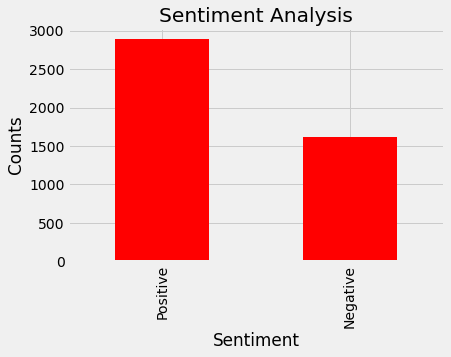

In [125]:
df_useful['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_useful['Analysis'].value_counts().plot(kind='bar', color = 'Red')
plt.show()